### <h1> Task 2 <h1> (Скалярное произведение векторов)

In [24]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot
from doExperiments import DoExperiments

In [25]:
from pathlib import Path
import os

PATH_TO_MPI = Path("D:\\Projects\\CLion_Projects\\Projects_MPI\\cmake-build-debug\\openmpi_scalar.exe")
FILE_NAME = Path('data/OpenMPI/scalar_mpi.csv')

if not os.path.exists(FILE_NAME):
    exp = DoExperiments(exe_path=PATH_TO_MPI)
    exp.run(filename=FILE_NAME)
else:
    print(f"File '{FILE_NAME}' already exists. Skipping function execution.")

File 'data\OpenMPI\scalar_mpi.csv' already exists. Skipping function execution.


In [26]:
data_mp = pd.read_csv('data/OpenMP/scalar_mp.csv')
data_mpi = pd.read_csv('data/OpenMPI/scalar_mpi.csv')
display(data_mp)
display(data_mpi)

,Num_Threads,Iter,Time
0,1,10,55
1,2,10,47
2,3,10,38
3,4,10,44
4,5,10,37
...,...,...,...
91,12,1000000,2307
92,13,1000000,2212
93,14,1000000,1999
94,15,1000000,1843


,Num_Threads,Iter,Time
0,1,10,25.8
1,2,10,1104.8
2,3,10,944.4
3,4,10,1270.9
4,5,10,1368.9
...,...,...,...
91,12,1000000,35296.3
92,13,1000000,36959.0
93,14,1000000,41996.9
94,15,1000000,49357.2


In [27]:
labels = ['OpenMP', 'OpenMPI']

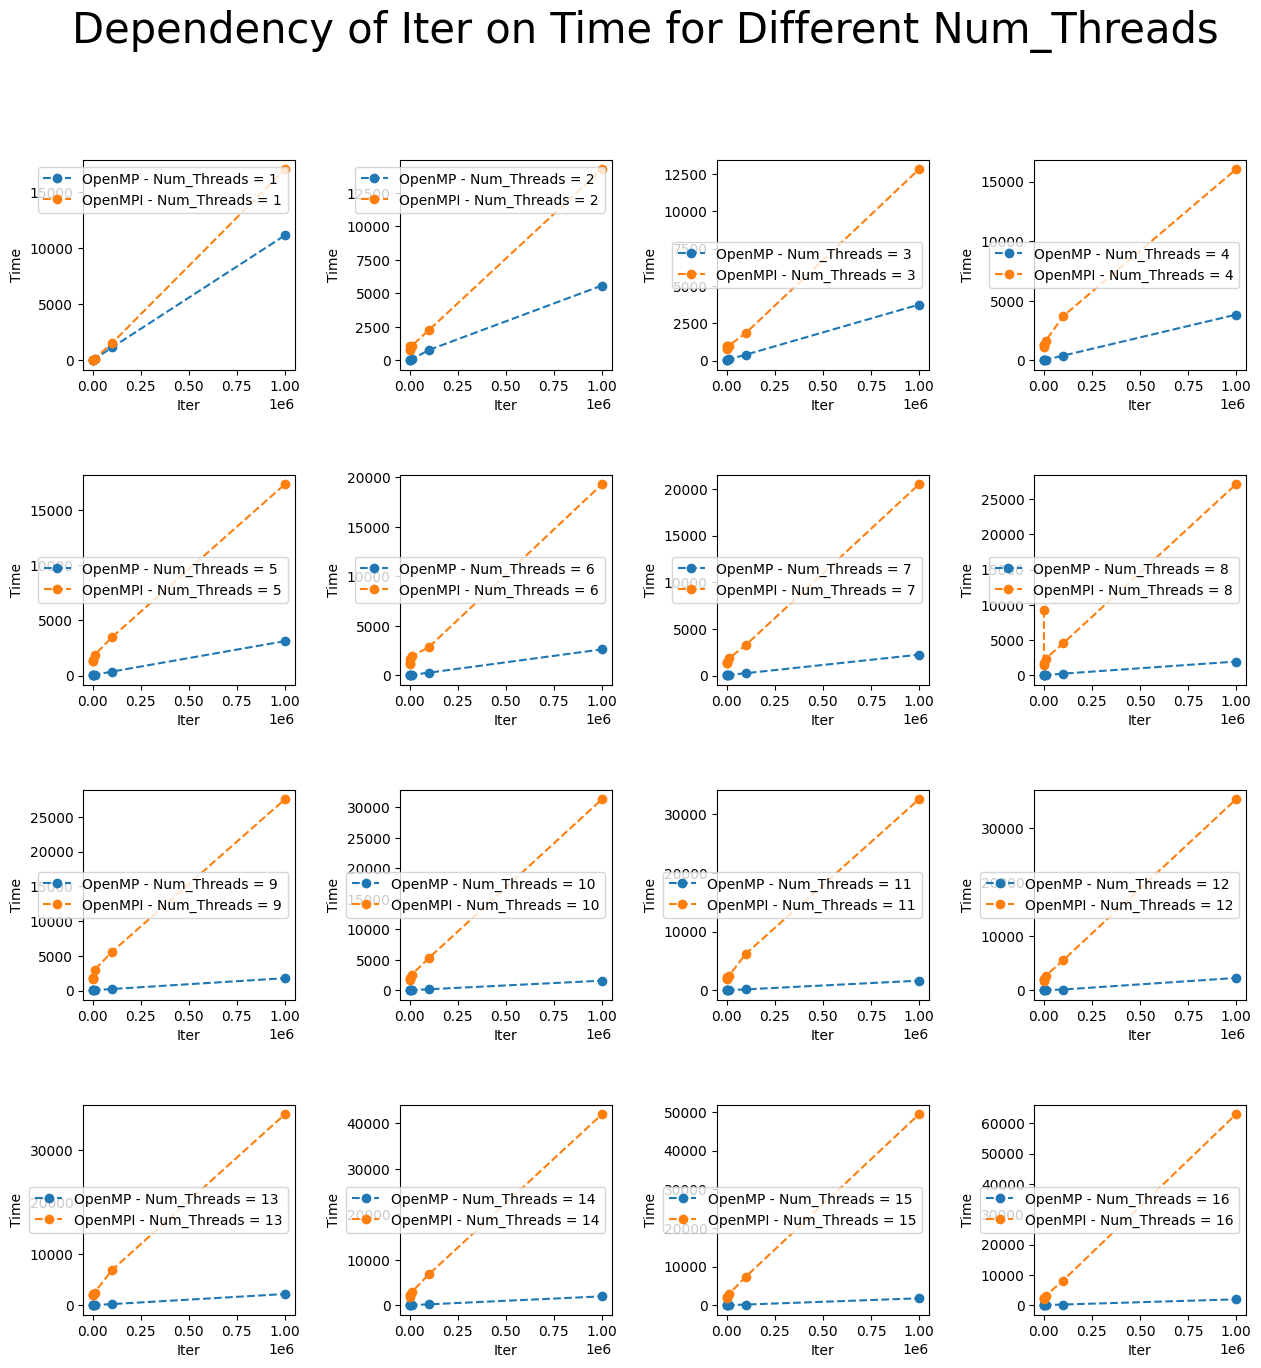

In [28]:
thread_groups_mp = data_mp.groupby('Num_Threads')
thread_groups_mpi = data_mpi.groupby('Num_Threads')

thread_groups = [thread_groups_mp, thread_groups_mpi]
time_iter_plot(thread_groups, labels)

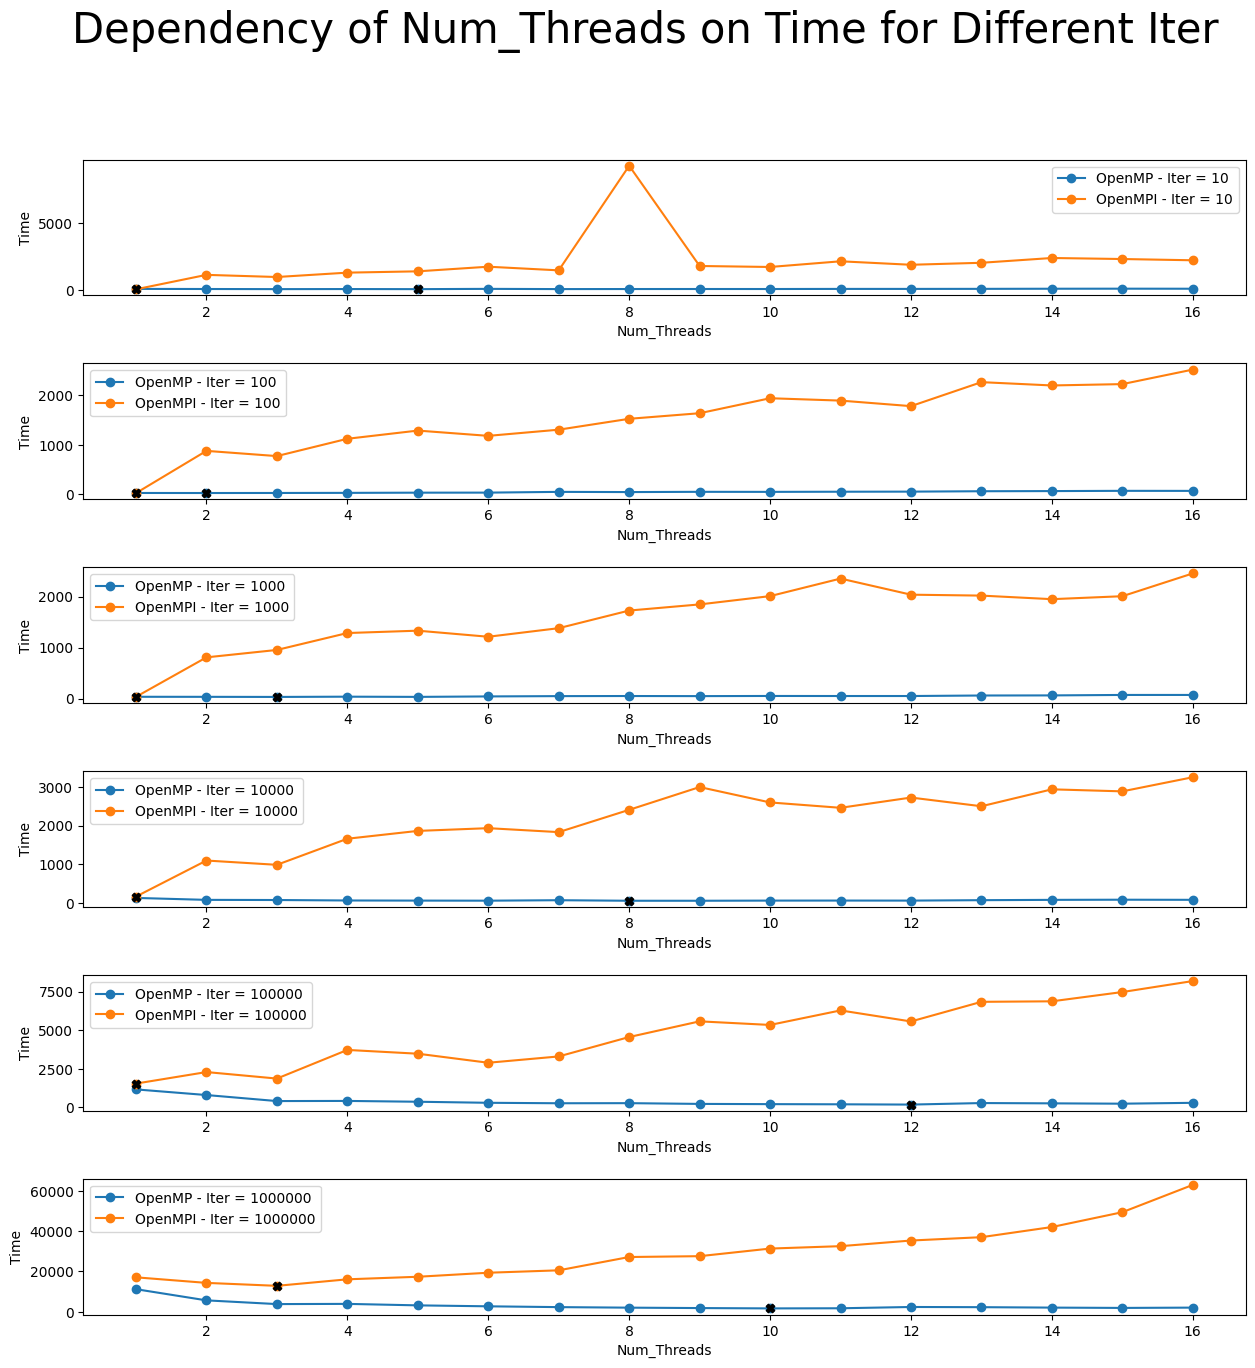

In [29]:
iter_groups_mp = data_mp.groupby('Iter', as_index=False)
iter_groups_mpi = data_mpi.groupby('Iter', as_index=False)

iter_groups = [iter_groups_mp, iter_groups_mpi]
time_thread_plot(iter_groups, labels)

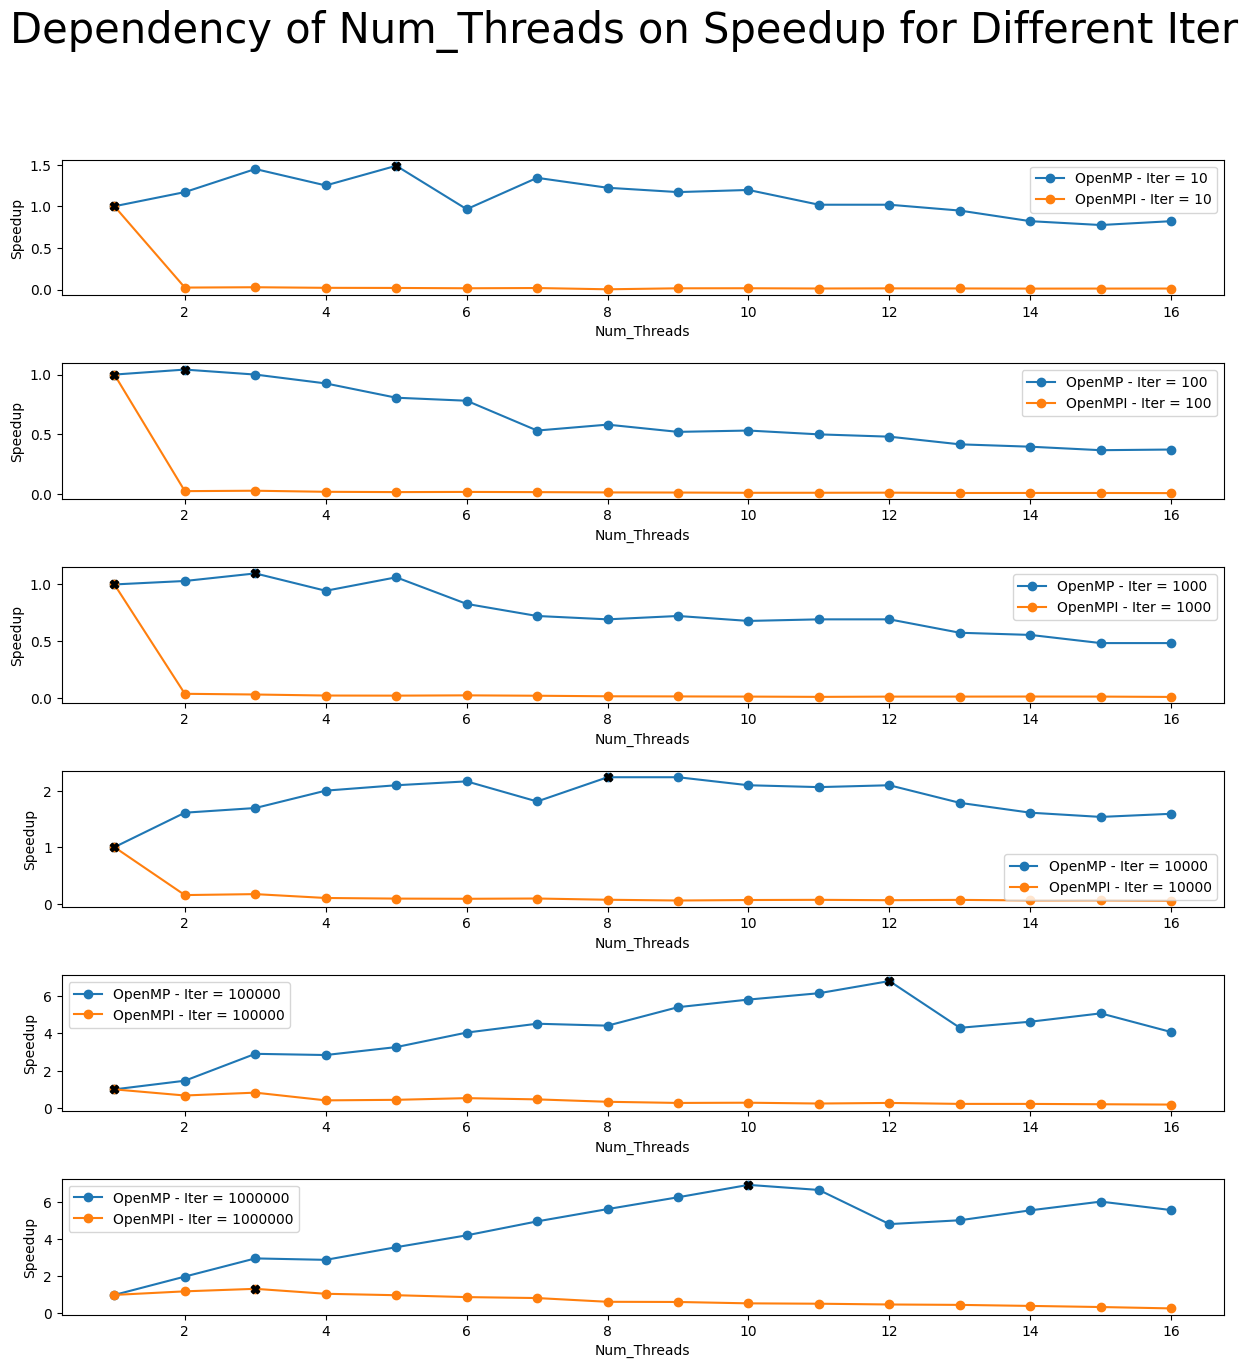

In [30]:
speedup_plot(iter_groups, labels)

# Вывод:
Из представленных графиков можно сделать вывод, что OpenMPI проигрывает OpenMP по производительности. Но стоит сделать важные замечания:
1. Num_Threads(MPI) это не одно и то же что Num_Threads(MP).
2. Задача скалярного произведения векторов считается легковесной.
3. Все вычисления происходили на одной вычислительной машине.
4. С увеличением кол-ва итераций разность между производительностью падает.

***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 